In [114]:
# Tools
import numpy as np 
import pandas as pd 
import glob 

# NLP 
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2

# Visualization 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

Las opiniones de cada sitio turístico estan en un archivo .csv por separado, primero leemos los datos y almacenamos en un dataframe

In [18]:
df_places = []
names_places = []
for review in glob.glob("./reviews_turistas/*"):
    df_places.append(pd.read_csv(review))
    names_places.append(str(review)[54:-8])

In [19]:
df_places[0].head()

Género  Edad Nacional ó Internacional Calificación  Escala  \
0   Femenino  33.0            Internacional    Excelente       5   
1  Masculino  50.0            Internacional    Muy bueno       4   
2   Femenino  24.0            Internacional    Excelente       5   
3  Masculino  32.0                 Nacional      Regular       3   
4  Masculino  48.0            Internacional      Regular       3   

   Número de aportaciones                              Título de la opinión  \
0                      52                                "Busy city market"   
1                     491  "People Watching, Local Feel Among The Tourists"   
2                      39                       "Recuerdos son más baratos"   
3                      19                          "Fuimos 2 veces a comer"   
4                      94                              "Not that impressed"   

                                             Opinión            País   Idioma  \
0  "The market under a large metal building is bu...  Estados Unidos   Inglés   
1  "Nicely done market with lots of food stalls, ...  Estados Unidos   Inglés   
2  "El primer piso de la segunda planta, comida s...   Corea del Sur  Coreano   
3  "Prueba las guacamayas y las comidas de la fon...          México  Español   
4  "I was excited to see this marcado. But it was...  Estados Unidos   Inglés   

  Dispositivo      Fecha  
0       Móvil  20/4/2018  
1       Móvil  15/4/2018  
2       Móvil  10/4/2018  
3       Móvil   8/4/2018  
4          PC   7/4/2018

In [20]:
print(names_places)

['Mercado Hidalgo', 'Casa de Diego Rivera', 'Universidad de Guanajuato', 'Museo de las Momias 1', 'Callejón del Beso 1', 'Jardín de la Unión 1', 'Teatro Juárez 1', 'Basilica Colegiata', 'Monumento Pípila 1', 'Alhóndiga']


Ahora limpiamos los datos, particularmente todas las edades que no correspondandan a un número se sustituyen por la edad promedio, esto para no eliminar información útil, además nos aseguramos de que algunas columnas teengan variable categorica y quitamos posibles espacios en blanco en los géneros. 

In [188]:
# Clean data 
df_places_clean = []
for df in df_places:
    mean_age = df['Edad'].mean()
    mean_score = df['Escala'].mean()
    current_df = df.copy()
    current_df['Edad'].fillna(value=mean_age, inplace=True) # clean NaN age 
    current_df['Escala'].fillna(value=mean_score, inplace=True) # clean NaN score
    current_df['Nacional ó Internacional'] = current_df['Nacional ó Internacional'].astype('category') # convert to categorical var
    current_df['Género'] = current_df['Género'].astype('category') # convert to categorical var
    current_df['Género'] = current_df['Género'].str.strip() # drop white spaces 
    df_places_clean.append(current_df)

Estadísticas básicas para scores y número de palabras. 

In [39]:
# mean and std of scores and words
from nltk import TweetTokenizer

for k, df in enumerate(df_places):
    mean_scores = df['Escala'].mean()
    std_scores = df['Escala'].std()

    n_words = np.zeros(df.shape[0])
    for i, review in enumerate(df['Opinión']):
        n_words[i] = len(review.split(' '))

    mean_words = n_words.mean()
    std_words = n_words.std()

    print(names_places[k])
    print(f"Promedio scores: {mean_scores:.2f}, desviación estandar scores: {std_scores:.2f}")
    print(f"Promedio número de palabras: {mean_words:.2f}, desviación estandar de número de palabras: {std_words:.2f}\n")


Mercado Hidalgo
Promedio scores: 3.95, desviación estandar scores: 0.95
Promedio número de palabras: 45.62, desviación estandar de número de palabras: 33.45

Casa de Diego Rivera
Promedio scores: 4.24, desviación estandar scores: 0.80
Promedio número de palabras: 49.28, desviación estandar de número de palabras: 30.45

Universidad de Guanajuato
Promedio scores: 4.60, desviación estandar scores: 0.61
Promedio número de palabras: 35.39, desviación estandar de número de palabras: 20.02

Museo de las Momias 1
Promedio scores: 3.68, desviación estandar scores: 1.14
Promedio número de palabras: 58.15, desviación estandar de número de palabras: 46.25

Callejón del Beso 1
Promedio scores: 4.00, desviación estandar scores: 0.97
Promedio número de palabras: 45.52, desviación estandar de número de palabras: 32.86

Jardín de la Unión 1
Promedio scores: 4.59, desviación estandar scores: 0.61
Promedio número de palabras: 43.12, desviación estandar de número de palabras: 36.79

Teatro Juárez 1
Promed

Como podemos apreciar, en general los lugarees tienen calificaciones promedio arriba de scores neutrales, aunque en algunos lugares como el Museo de las momias las opiniones varian considerablemente respecto a los demás lugares con una desviación estandar de 1.14. Por otro lado se puede ver que en general varia mucho el número de palabras por opinión. 

Distribución de edades por lugar.

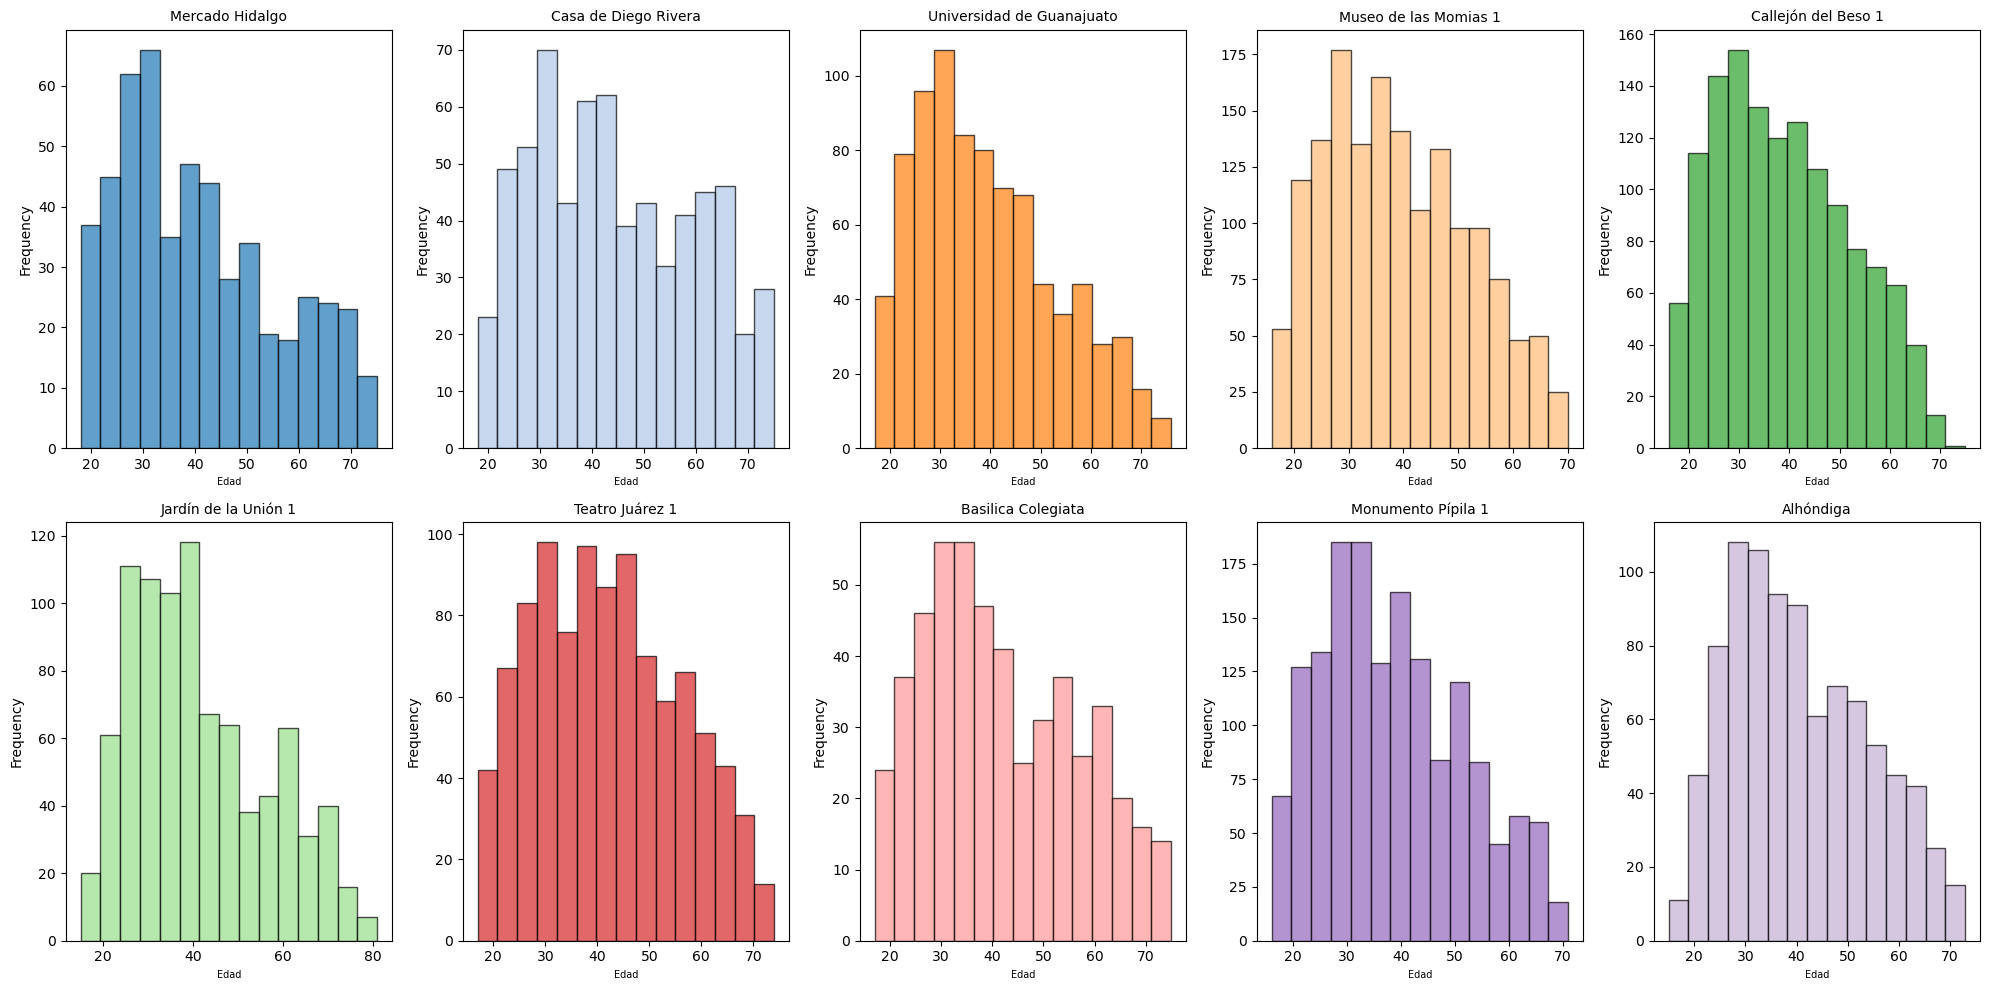

In [40]:
# Number of histograms to display
num_histograms = 10

# Create a grid of subplots 
num_rows = 2
num_cols = 5

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Flatten the axes array to iterate through subplots easily
axes_flat = axes.flatten()

# Get a list of distinct colors from the tab20 colormap
colors = plt.cm.tab20.colors[:num_histograms]

# Iterate through the DataFrame columns and plot histograms with distinct colors
for i, ax in enumerate(axes_flat):
    df_places[i]['Edad'].plot.hist(ax=ax, bins=15, alpha=0.7, color=colors[i], edgecolor='black')
    ax.set_title(f'{names_places[i]}', fontsize = 10)
    ax.set_xlabel('Edad', fontsize = 7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

De los histogramas podemos ver que la edad de la mayoría de los turístas se encuentra en el rango de los 20 a los 30 años. 

Distribución de tipo de visitante (Nacional o Internacional) por lugar 

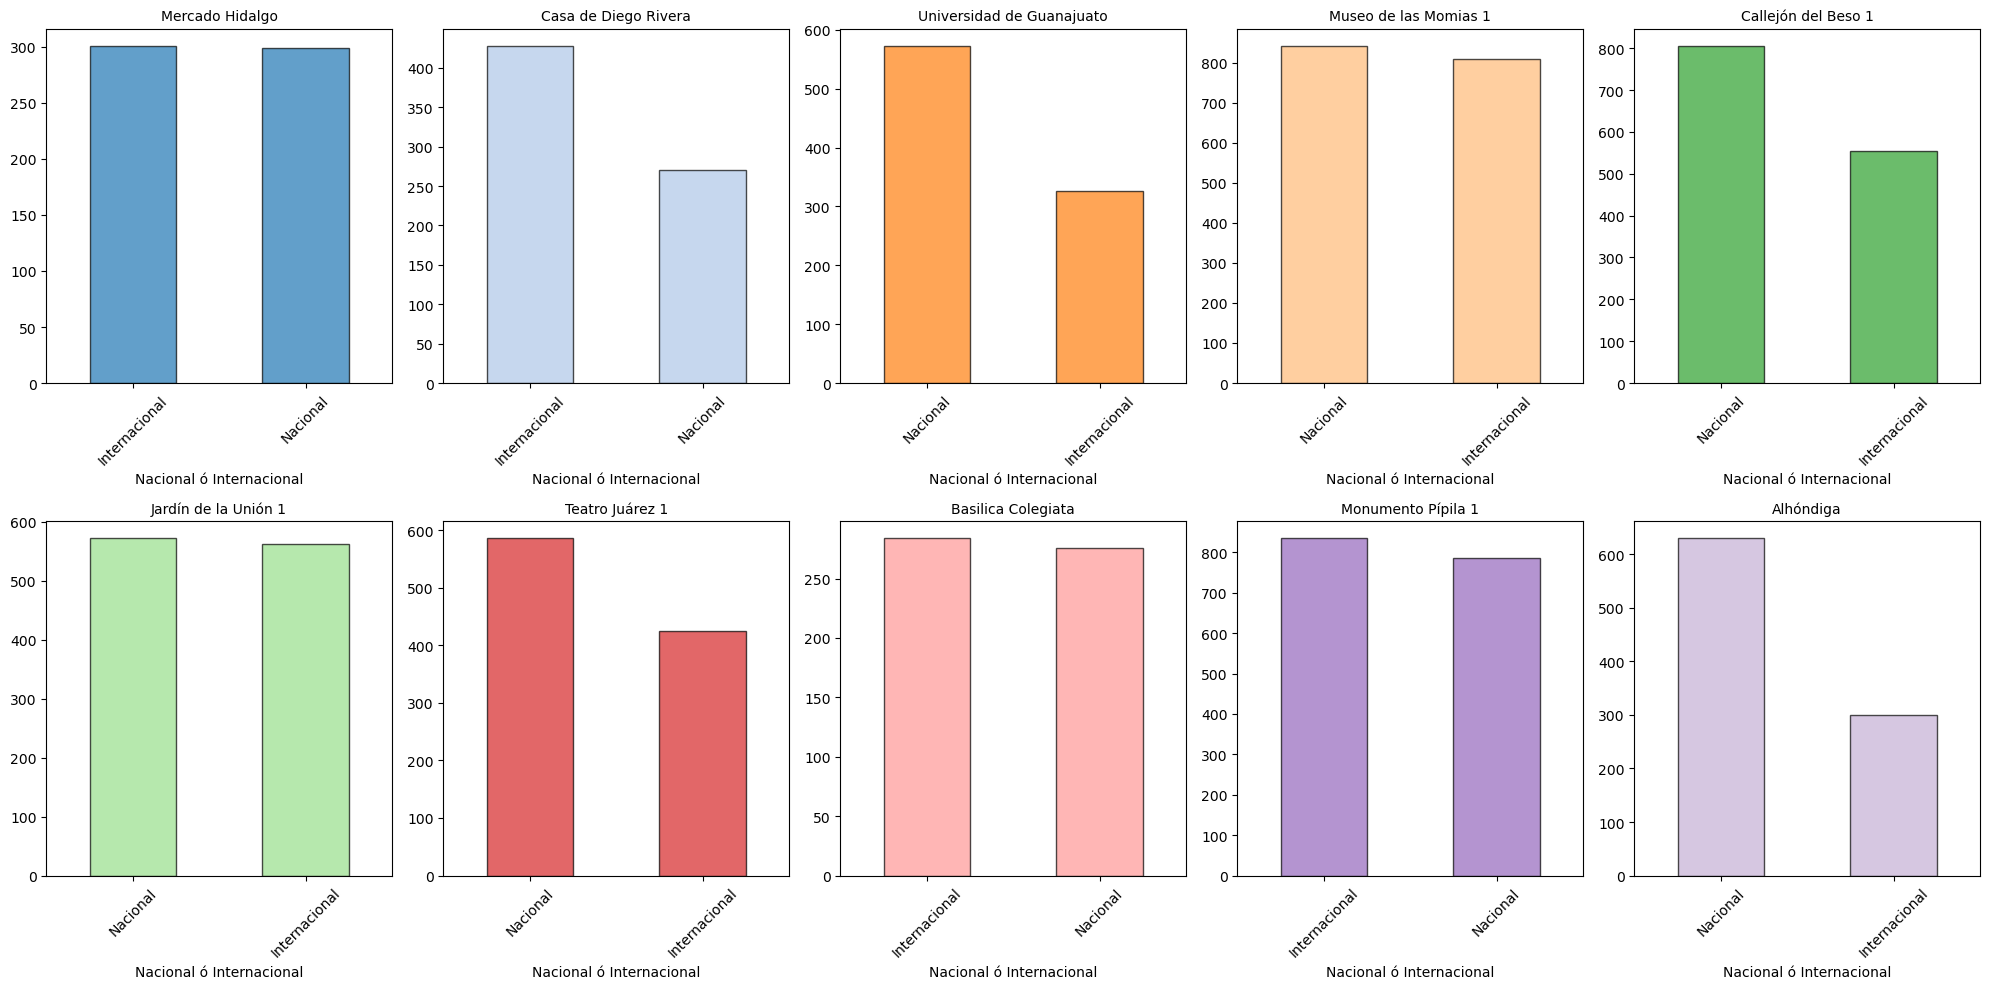

In [65]:
num_histograms = 10
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

axes_flat = axes.flatten()

colors = plt.cm.tab20.colors[:num_histograms]

# Iterate through the DataFrame columns and plot histograms with distinct colors
for i, ax in enumerate(axes_flat):
    df_places_clean[i]['Nacional ó Internacional'].value_counts().plot(ax=ax, kind='bar', alpha=0.7, color=colors[i], edgecolor='black')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f'{names_places[i]}', fontsize = 10)

plt.tight_layout()
plt.show()

Aquí podemos apreciar que la mayoría de los turistas son de tipo internacional, se puede ver esto de manera muy marcada en lugares como la Alhóndiga o la Casa de Diego Rivera. 

Distribución de género (Masculino Femenino) por lugar.

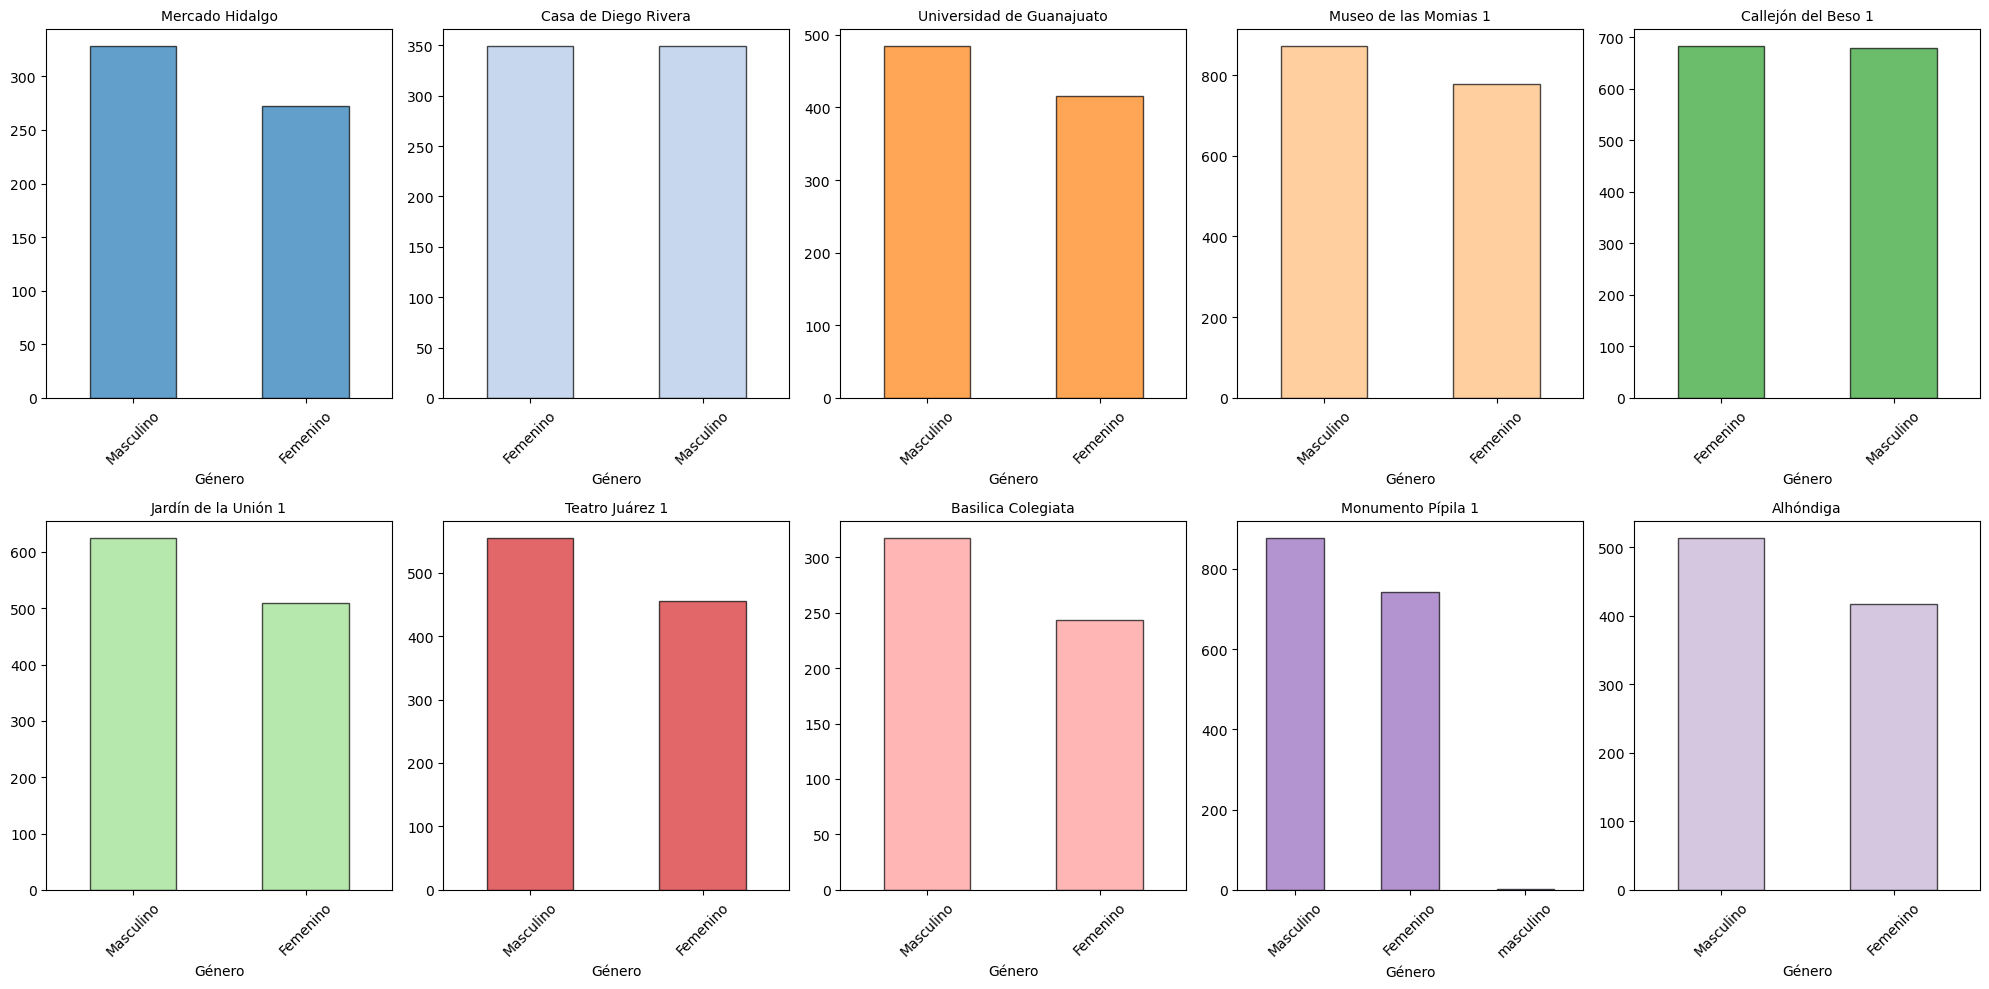

In [73]:
num_histograms = 10
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

axes_flat = axes.flatten()

colors = plt.cm.tab20.colors[:num_histograms]

# Iterate through the DataFrame columns and plot histograms with distinct colors
for i, ax in enumerate(axes_flat):
    df_places_clean[i]['Género'].value_counts().plot(ax=ax, kind='bar', alpha=0.7, color=colors[i], edgecolor='black')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f'{names_places[i]}', fontsize = 10)

plt.tight_layout()
plt.show()

Distribución de idiomas por lugar.

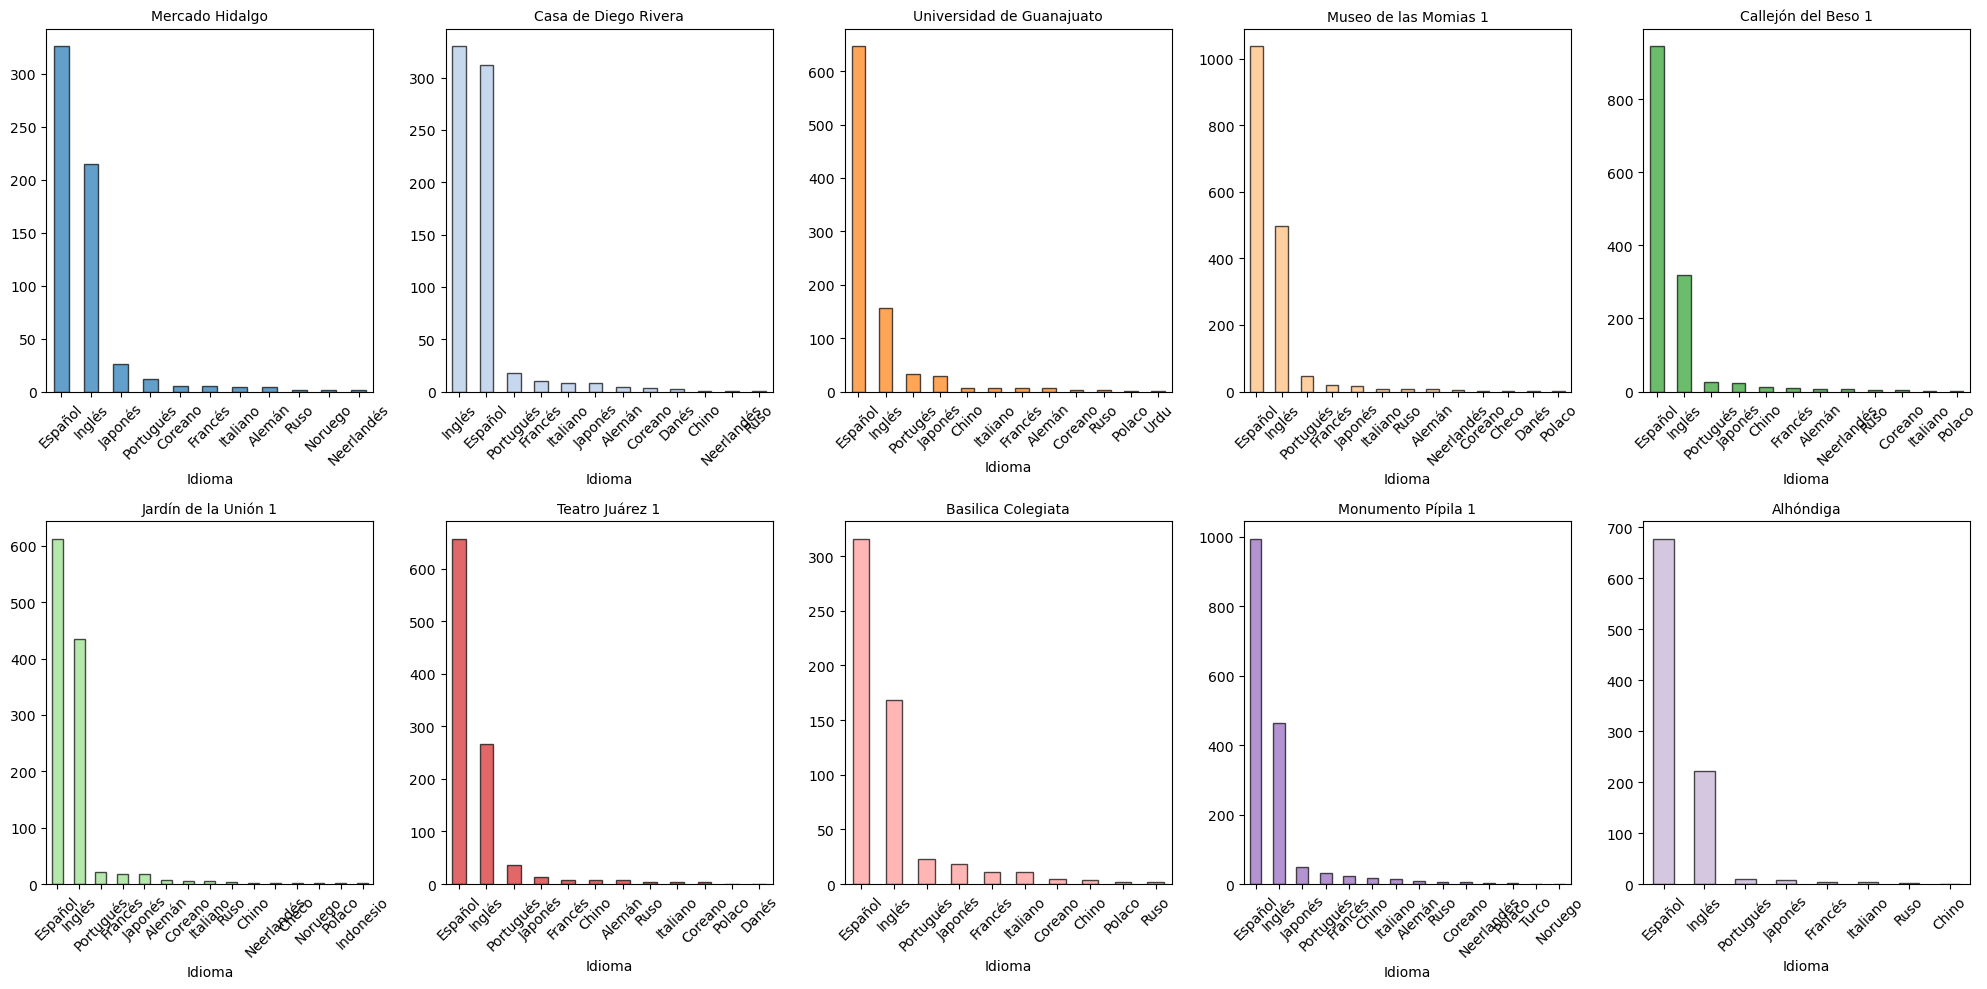

In [74]:
num_histograms = 10
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

axes_flat = axes.flatten()

colors = plt.cm.tab20.colors[:num_histograms]

# Iterate through the DataFrame columns and plot histograms with distinct colors
for i, ax in enumerate(axes_flat):
    df_places_clean[i]['Idioma'].value_counts().plot(ax=ax, kind='bar', alpha=0.7, color=colors[i], edgecolor='black')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f'{names_places[i]}', fontsize = 10)

plt.tight_layout()
plt.show()

De aquí podemos ver que la mayor parte de las opiniones están en Inglés y Español y un menor número en otros idiomas. Lo cuál es initeresante para tomar en cuenta en el análisis posterior. 

Ahora utilizaremos chi2 para feature selection y posteriormente hacer nube de palabras 

In [117]:
# Extract reviews and scores
reviews, scores = [], []
for df in df_places:
    current_reviews = [opinion.lower() for opinion in df['Opinión']]
    reviews.append(current_reviews)
    scores.append(np.array(df['Escala']))

In [118]:
top_feature_places = []

for i in range(10):
    # Create bow 
    vectorizer = CountVectorizer()
    bow = vectorizer.fit_transform(reviews[i]).toarray()

    # Feature selection 
    kbest = SelectKBest(chi2, k=50)
    bow_kbest = kbest.fit_transform(bow, scores[i])

    feature_names = vectorizer.get_feature_names_out()
    chi2_scores = kbest.scores_

    feature_chi2 = dict(zip(feature_names, chi2_scores))

    top_feature_places.append(dict(sorted(feature_chi2.items(), key=lambda item: item[1], reverse=True)[:50]))

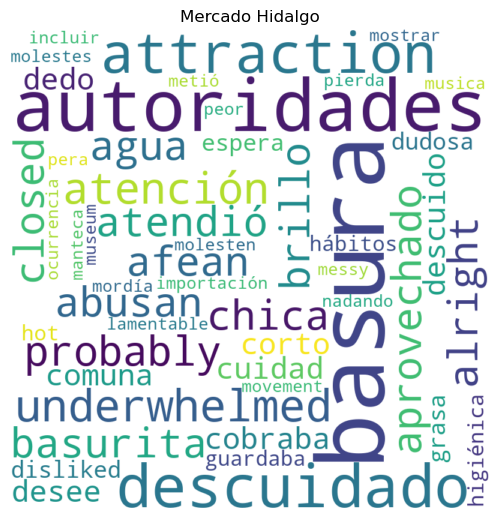

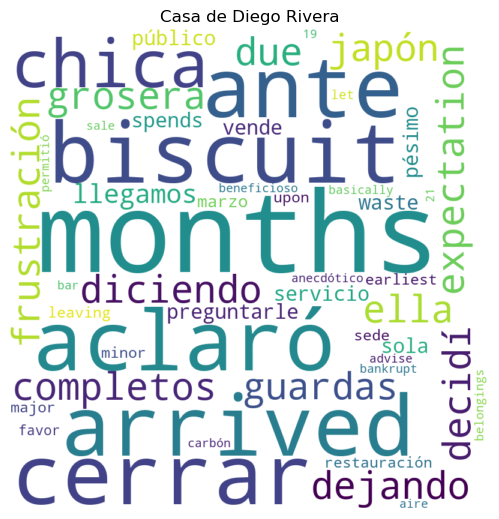

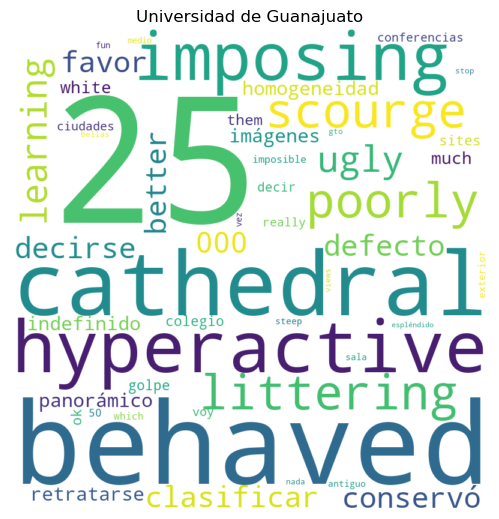

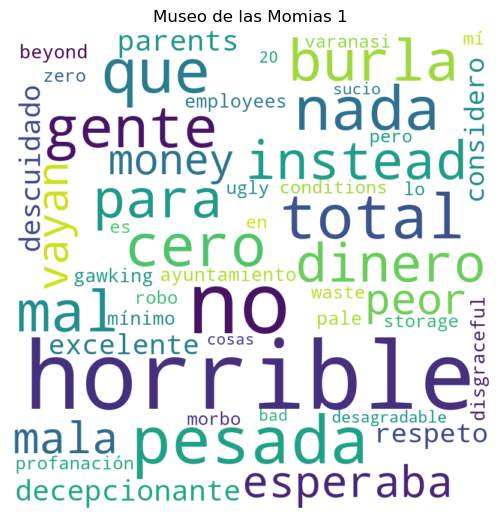

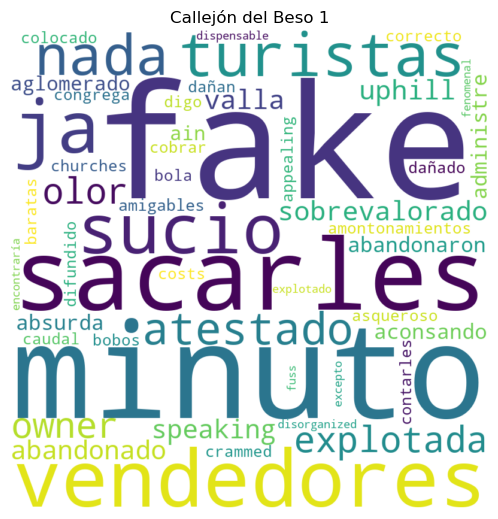

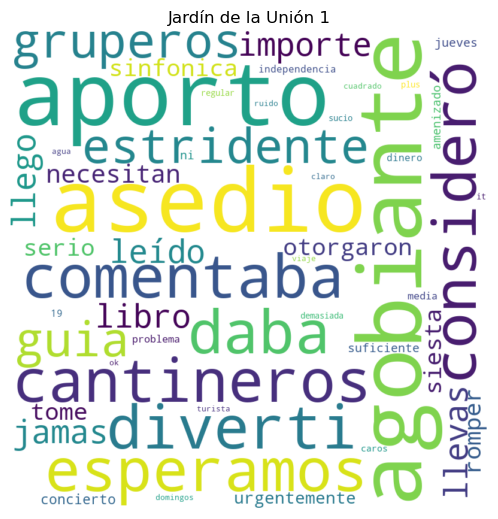

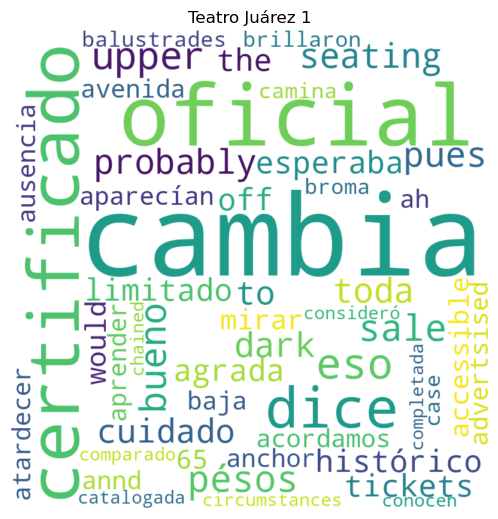

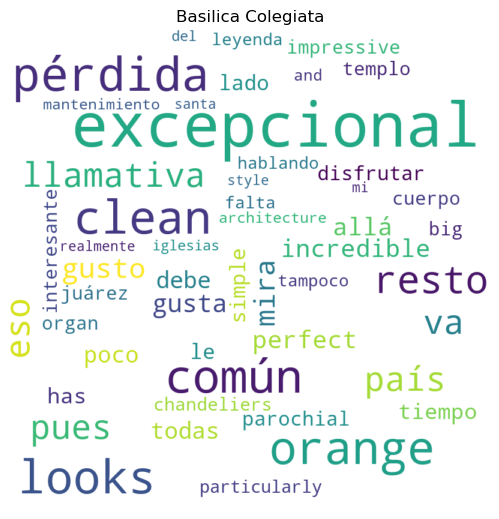

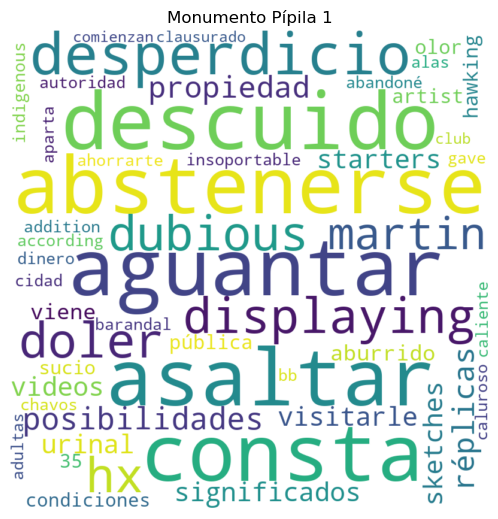

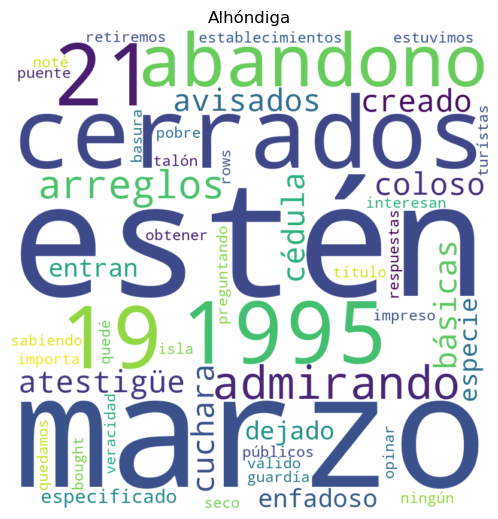

In [120]:
for i, top_features in enumerate(top_feature_places):
    # Display the word cloud 
    wordcloud = WordCloud(
        width = 800, height = 800,
        background_color ='white',
        max_words=50,
        min_font_size = 10)

    # Generate the word cloud using the frequencies (importance scores)
    wordcloud.generate_from_frequencies(top_features)

    # Display the word cloud
    plt.figure(figsize=(5, 5), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(names_places[i])
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


Detección automática de topicos.

In [159]:
# First by gender 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')
english_stopwords = stopwords.words('english')

genders = ['Masculino', 'Femenino'] 

for i in range(10):
    print(names_places[i] + '\n')
    for gender in genders:
        print(gender + '\n')
        # Extract reviews by group 
        indices_curr_group = df_places_clean[i]['Género'] == gender
        current_reviews = [review for review, mask in zip(reviews[i], indices_curr_group) if mask]

        # Vectorize documents 
        vectorizer = TfidfVectorizer(stop_words=spanish_stopwords+english_stopwords)
        bow = vectorizer.fit_transform(current_reviews).toarray()
        # Normalize the bow 
        bow = normalize(bow, norm='l2')

        # Apply SVD decomposition 
        svd_model = TruncatedSVD(n_components=3, random_state=42)
        lsa_topics = svd_model.fit_transform(bow)

        # Extract topics 
        terms = vectorizer.get_feature_names_out()
        for k, comp in enumerate(svd_model.components_):
            terms_topic = zip(terms, comp)
            sorted_terms = sorted(terms_topic, key=lambda item: item[1], reverse=True)[:10]
            print(f"Tópico {k+1}:")
            print([word_topic for word_topic, score in sorted_terms])
            print("")

    

Mercado Hidalgo

Masculino

Tópico 1:
['mercado', 'comida', 'lugar', 'artesanías', 'comprar', 'guanajuato', 'comer', 'si', 'recuerdos', 'precios']

Tópico 2:
['market', 'food', 'place', 'stalls', 'mexican', 'buy', 'building', 'great', 'souvenirs', 'many']

Tópico 3:
['mercado', 'interior', 'bonito', 'cualquier', 'arquitectura', 'fachada', 'ciudad', 'bonita', 'encuentra', 'mexicano']

Femenino

Tópico 1:
['mercado', 'lugar', 'comida', 'si', 'comprar', 'dulces', 'artesanías', 'comer', 'buen', 'precios']

Tópico 2:
['market', 'food', 'great', 'buy', 'souvenirs', 'local', 'stalls', 'visit', 'lots', 'place']

Tópico 3:
['planta', 'edificio', 'artesanías', 'mercado', 'alta', 'baja', 'arquitectura', 'venden', 'puestos', 'hermosa']

Casa de Diego Rivera

Masculino

Tópico 1:
['rivera', 'diego', 'museum', 'art', 'work', 'home', 'casa', 'house', 'interesting', 'artists']

Tópico 2:
['casa', 'obras', 'museo', 'lugar', 'diego', 'arte', 'si', 'bien', 'artista', 'exposiciones']

Tópico 3:
['museum',

In [160]:
# Now by National or International 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')
english_stopwords = stopwords.words('english')

tourist_type = ['Nacional', 'Internacional']

for i in range(10):
    print(names_places[i] + '\n')
    for tourist in tourist_type:
        print(tourist + '\n')
        # Extract reviews by group 
        indices_curr_group = df_places_clean[i]['Nacional ó Internacional'] == tourist
        current_reviews = [review for review, mask in zip(reviews[i], indices_curr_group) if mask]

        # Vectorize documents 
        vectorizer = TfidfVectorizer(stop_words=spanish_stopwords+english_stopwords)
        bow = vectorizer.fit_transform(current_reviews).toarray()
        # Normalize the bow 
        bow = normalize(bow, norm='l2')

        # Apply SVD decomposition 
        svd_model = TruncatedSVD(n_components=3, random_state=42)
        lsa_topics = svd_model.fit_transform(bow)

        # Extract topics 
        terms = vectorizer.get_feature_names_out()
        for k, comp in enumerate(svd_model.components_):
            terms_topic = zip(terms, comp)
            sorted_terms = sorted(terms_topic, key=lambda item: item[1], reverse=True)[:10]
            print(f"Tópico {k+1}:")
            print([word_topic for word_topic, score in sorted_terms])
            print("")

    

Mercado Hidalgo

Nacional

Tópico 1:
['mercado', 'comida', 'lugar', 'si', 'artesanías', 'comprar', 'dulces', 'comer', 'precios', 'guanajuato']

Tópico 2:
['planta', 'artesanías', 'alta', 'baja', 'puede', 'interior', 'mercado', 'frutas', 'puestos', 'comida']

Tópico 3:
['market', 'souvenirs', 'place', 'food', 'mercado', 'local', 'great', 'buy', 'find', 'carnitas']

Internacional

Tópico 1:
['market', 'food', 'stalls', 'place', 'souvenirs', 'buy', 'great', 'visit', 'building', 'like']

Tópico 2:
['mercado', 'lugar', 'comida', 'comprar', 'recuerdos', 'comer', 'puede', 'buen', 'gran', 'aquí']

Tópico 3:
['floor', 'market', 'large', 'local', 'indoor', 'look', 'vendors', 'many', 'second', 'street']

Casa de Diego Rivera

Nacional

Tópico 1:
['diego', 'casa', 'rivera', 'obras', 'museo', 'lugar', 'arte', 'exposiciones', 'si', 'artistas']

Tópico 2:
['house', 'art', 'work', 'rivera', 'see', 'diego', 'interesting', 'museum', 'works', 'well']

Tópico 3:
['vale', 'pena', 'gran', 'muchas', 'artista

In [161]:
# Young peaple
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')
english_stopwords = stopwords.words('english')

for i in range(10):
    print(names_places[i] + '\n')
    # Extract reviews by group 
    indices_curr_group = df_places_clean[i]['Edad'] <= 30.0 
    current_reviews = [review for review, mask in zip(reviews[i], indices_curr_group) if mask]

    # Vectorize documents 
    vectorizer = TfidfVectorizer(stop_words=spanish_stopwords+english_stopwords)
    bow = vectorizer.fit_transform(current_reviews).toarray()
    # Normalize the bow 
    bow = normalize(bow, norm='l2')

    # Apply SVD decomposition 
    svd_model = TruncatedSVD(n_components=3, random_state=42)
    lsa_topics = svd_model.fit_transform(bow)

    # Extract topics 
    terms = vectorizer.get_feature_names_out()
    for k, comp in enumerate(svd_model.components_):
        terms_topic = zip(terms, comp)
        sorted_terms = sorted(terms_topic, key=lambda item: item[1], reverse=True)[:10]
        print(f"Tópico {k+1}:")
        print([word_topic for word_topic, score in sorted_terms])
        print("")

    

Mercado Hidalgo

Tópico 1:
['mercado', 'comida', 'si', 'lugar', 'comer', 'artesanías', 'comprar', 'dulces', 'guanajuato', 'precios']

Tópico 2:
['food', 'market', 'place', 'traditional', 'floor', 'buy', 'items', 'go', 'mexican', 'one']

Tópico 3:
['lugar', 'buen', 'precio', 'comprar', 'tipo', 'artesanías', 'guanajuato', 'bonito', 'alimentos', 'lleno']

Casa de Diego Rivera

Tópico 1:
['diego', 'casa', 'rivera', 'obras', 'museo', 'pinturas', 'arte', 'lugar', 'pena', 'vale']

Tópico 2:
['art', 'museum', 'work', 'see', 'house', 'visit', 'home', 'place', 'collection', 'small']

Tópico 3:
['pena', 'vale', 'muchas', 'pinturas', 'parte', 'obra', 'maestro', 'gran', 'arriba', 'bonito']

Universidad de Guanajuato

Tópico 1:
['guanajuato', 'universidad', 'lugar', 'ciudad', 'edificio', 'vista', 'arquitectura', 'escaleras', 'subir', 'hermosa']

Tópico 2:
['vale', 'pena', 'arquitectura', 'edificio', 'universidad', 'gran', 'entrar', 'única', 'méxico', 'pasillos']

Tópico 3:
['guanajuato', 'visitar', 

In [162]:
# Old peaple
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')
english_stopwords = stopwords.words('english')

for i in range(10):
    print(names_places[i] + '\n')
    # Extract reviews by group 
    indices_curr_group = df_places_clean[i]['Edad'] > 30.0 
    current_reviews = [review for review, mask in zip(reviews[i], indices_curr_group) if mask]

    # Vectorize documents 
    vectorizer = TfidfVectorizer(stop_words=spanish_stopwords+english_stopwords)
    bow = vectorizer.fit_transform(current_reviews).toarray()
    # Normalize the bow 
    bow = normalize(bow, norm='l2')

    # Apply SVD decomposition 
    svd_model = TruncatedSVD(n_components=3, random_state=42)
    lsa_topics = svd_model.fit_transform(bow)

    # Extract topics 
    terms = vectorizer.get_feature_names_out()
    for k, comp in enumerate(svd_model.components_):
        terms_topic = zip(terms, comp)
        sorted_terms = sorted(terms_topic, key=lambda item: item[1], reverse=True)[:10]
        print(f"Tópico {k+1}:")
        print([word_topic for word_topic, score in sorted_terms])
        print("")

    

Mercado Hidalgo

Tópico 1:
['mercado', 'market', 'comida', 'lugar', 'food', 'guanajuato', 'comprar', 'artesanías', 'souvenirs', 'buen']

Tópico 2:
['market', 'food', 'place', 'stalls', 'great', 'buy', 'souvenirs', 'building', 'lots', 'visit']

Tópico 3:
['planta', 'artesanías', 'alta', 'puestos', 'baja', 'frutas', 'ciudad', 'venden', 'mercado', 'etc']

Casa de Diego Rivera

Tópico 1:
['rivera', 'diego', 'museum', 'art', 'work', 'home', 'see', 'interesting', 'house', 'well']

Tópico 2:
['casa', 'obras', 'museo', 'diego', 'lugar', 'rivera', 'artista', 'artistas', 'bien', 'arte']

Tópico 3:
['art', 'enjoyed', 'home', 'artists', 'museum', 'well', 'visit', 'works', 'displayed', 'displays']

Universidad de Guanajuato

Tópico 1:
['guanajuato', 'universidad', 'edificio', 'ciudad', 'lugar', 'arquitectura', 'vista', 'si', 'escaleras', 'subir']

Tópico 2:
['building', 'university', 'great', 'beautiful', 'view', 'stairs', 'city', 'steps', 'architecture', 'nice']

Tópico 3:
['lugar', 'vale', 'pena'

Nube de palabras opiniones negativas 

In [189]:
# Extract negative reviews and its scores
top_features_negative = []
for i in range(10):
    indices_negative_reviews = df_places_clean[i]['Escala'] < 3
    selected_reviews = [review for review, mask in zip(reviews[i], indices_negative_reviews) if mask]
    selected_scores = [score for score, mask in zip(scores[i], indices_negative_reviews) if mask]

    # Vectorize 
    vectorizer = CountVectorizer()
    bow = vectorizer.fit_transform(selected_reviews)
    # print(bow.shape)

    # Do feature selection 
    kbest = SelectKBest(chi2, k=28)
    bow_kbest = kbest.fit_transform(bow, selected_scores)
    # print(bow_kbest.shape)

    # Extract words 
    feature_chi2score = dict(zip(vectorizer.get_feature_names_out(), kbest.scores_))
    top_features_negative.append(dict(sorted(feature_chi2score.items(), key=lambda item: item[1], reverse=True)))


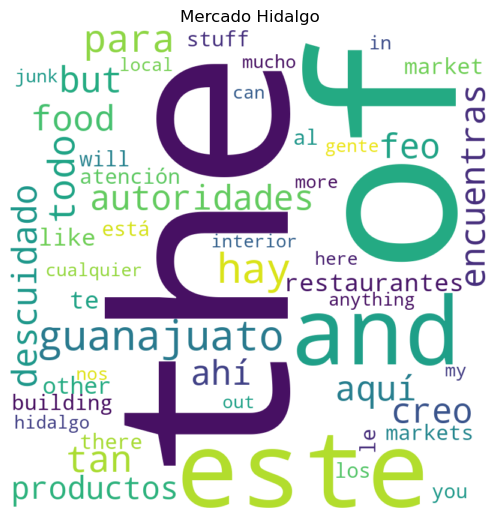

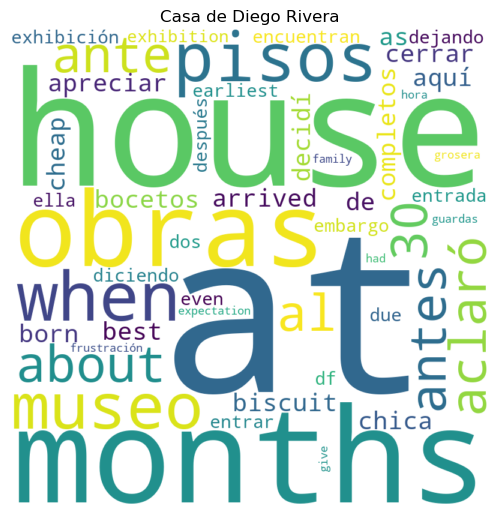

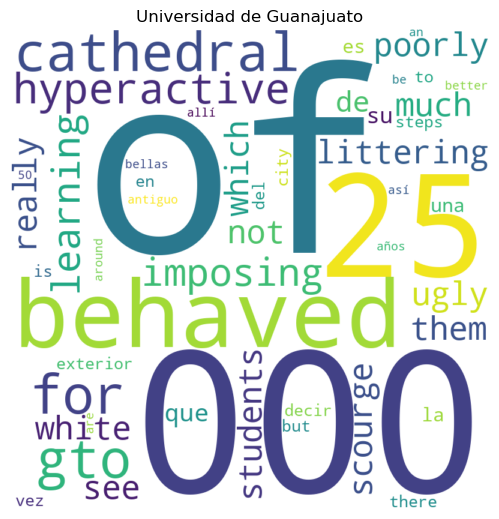

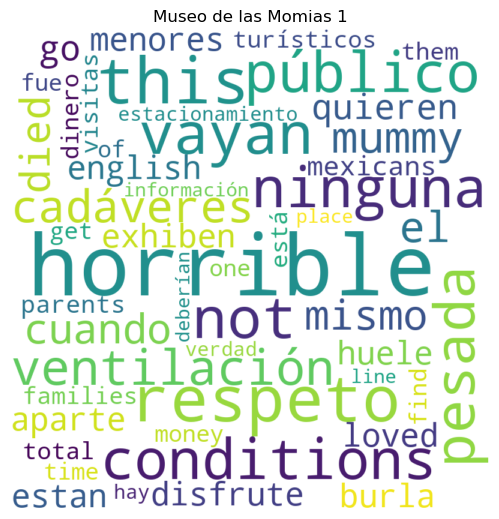

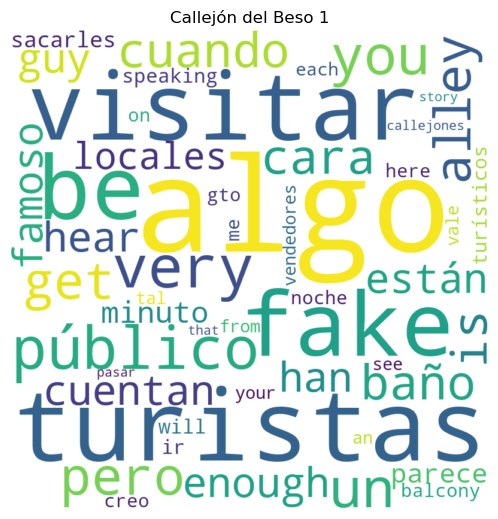

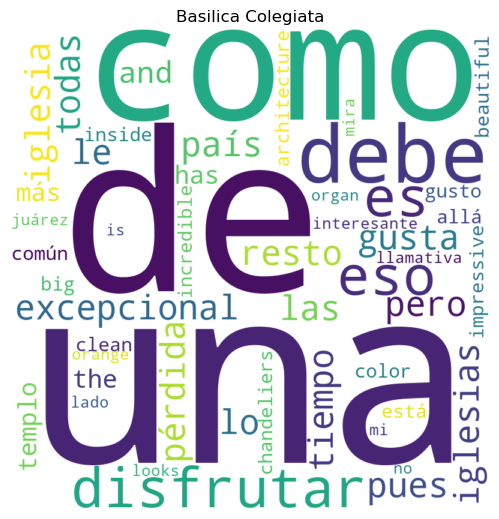

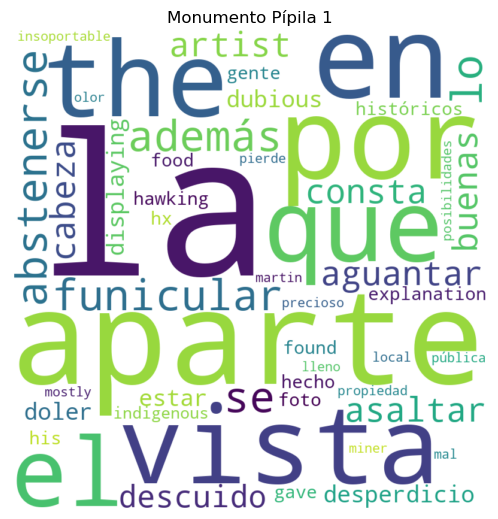

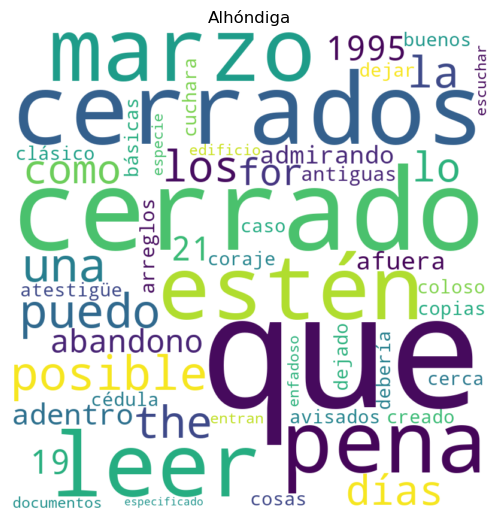

In [195]:
for k, top_feature in enumerate(top_features_negative):
    # Display the word cloud 
    wordcloud = WordCloud(
        width = 800, height = 800,
        background_color ='white',
        max_words=50,
        min_font_size = 10)

    # Generate the word cloud using the frequencies (importance scores)
    try:
        wordcloud.generate_from_frequencies(top_feature)

        # Display the word cloud
        plt.figure(figsize=(5, 5), facecolor=None)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.title(names_places[k])
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.show()
    except:
        pass


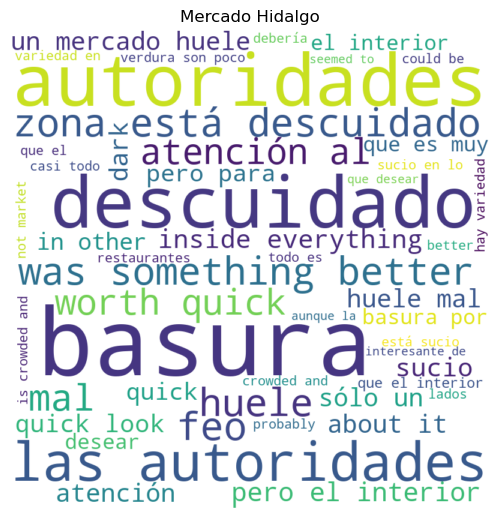

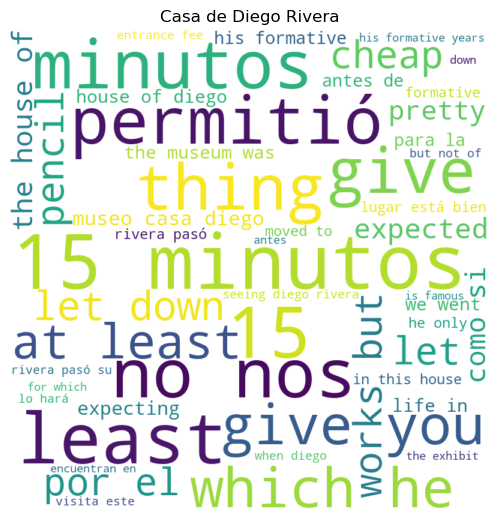

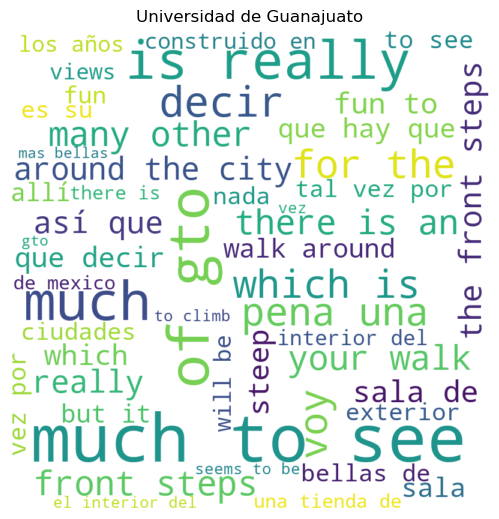

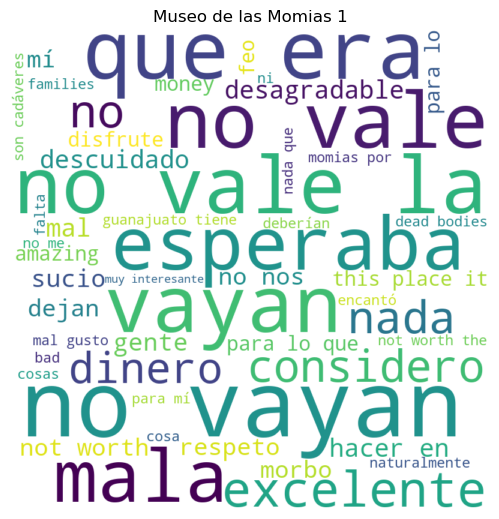

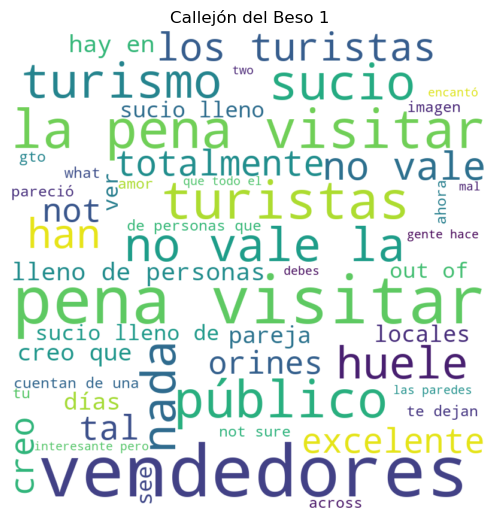

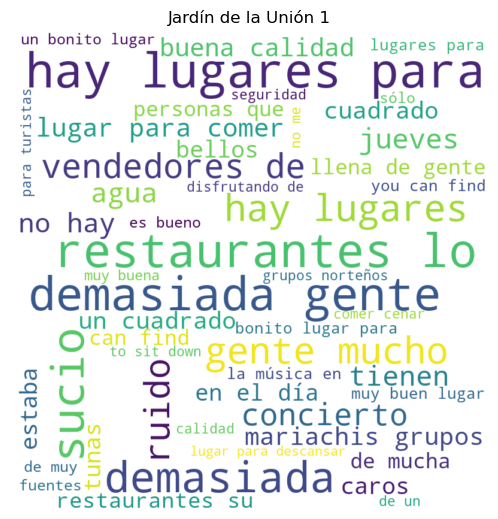

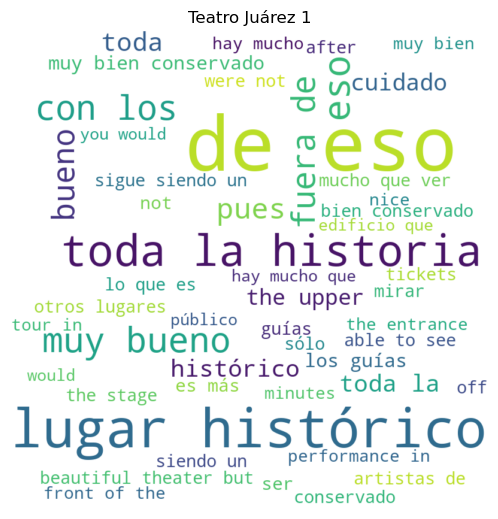

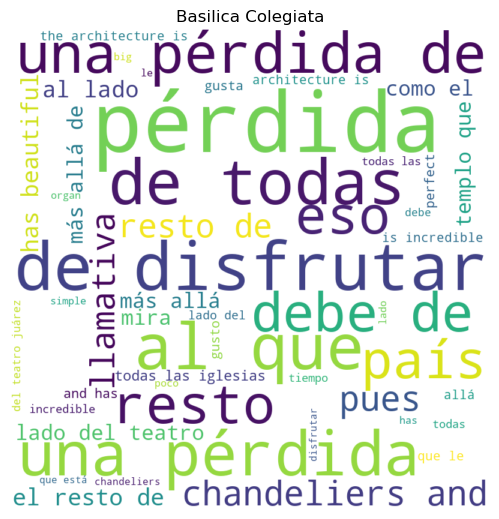

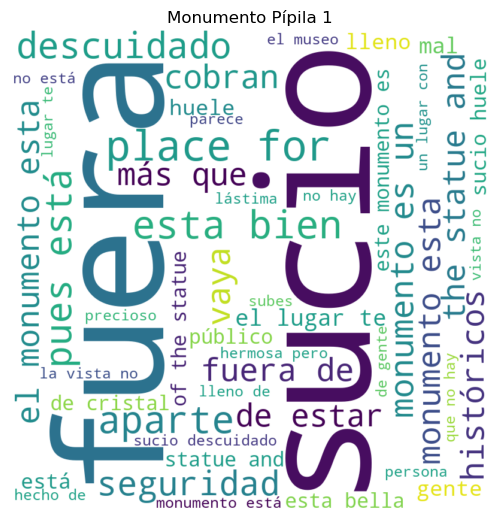

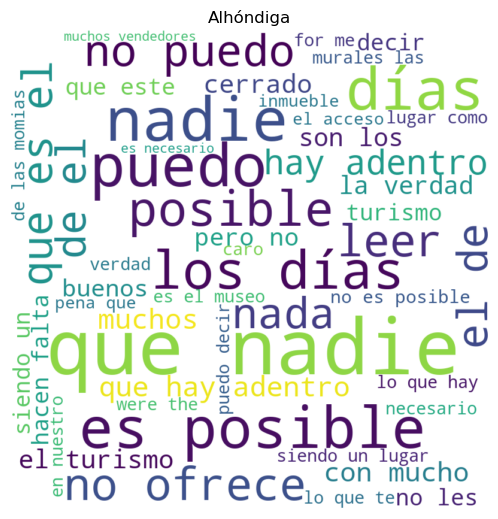

In [287]:
for j in range(10):
    # Create concatenated bow
    bows = []
    features_names = []
    for k in range(3):
        vectorizer = TfidfVectorizer(ngram_range=(k+1, k+1))
        bow = vectorizer.fit_transform(reviews[j])
        bow_array = bow.toarray()
        if k == 1:
            top_tfidf = sorted(dict([(bow_array[:, i].mean(), i) for i in range(bow_array.shape[1])]).items(), reverse=True)[:2000]
        else:
            top_tfidf = sorted(dict([(bow_array[:, i].mean(), i) for i in range(bow_array.shape[1])]).items(), reverse=True)[:1000]
        top_indices = [i for (weight, i) in top_tfidf]
        bow_top = bow_array[:, top_indices]
        features_top = vectorizer.get_feature_names_out()[top_indices]
        bows.append(bow_top)
        features_names += list(features_top)

    bow = np.hstack((bows[0], bows[1], bows[2]))

    # Feature selection 
    kbest_concatenate = SelectKBest(chi2, k=1000)
    bow_selected = kbest_concatenate.fit_transform(bow, scores[j])

    features_chi2 = dict(sorted(dict(zip(features_names, kbest_concatenate.scores_)).items(), 
                        key=lambda item: item[1], reverse=True)[:50])
    
    # Display the word cloud 
    wordcloud = WordCloud(
        width = 800, height = 800,
        background_color ='white',
        max_words=50,
        min_font_size = 10)

    # Generate the word cloud using the frequencies (importance scores)
    wordcloud.generate_from_frequencies(features_chi2)

    # Display the word cloud
    plt.figure(figsize=(5, 5), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(names_places[j])
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()



Para este punto me pareció útil hacer un dispersion plot, usando el top 20 de palabras dadas por chi2, de esta forma podemos ver como han evolucionado los topicos asociados a las opiniones a loo largo de los años. 

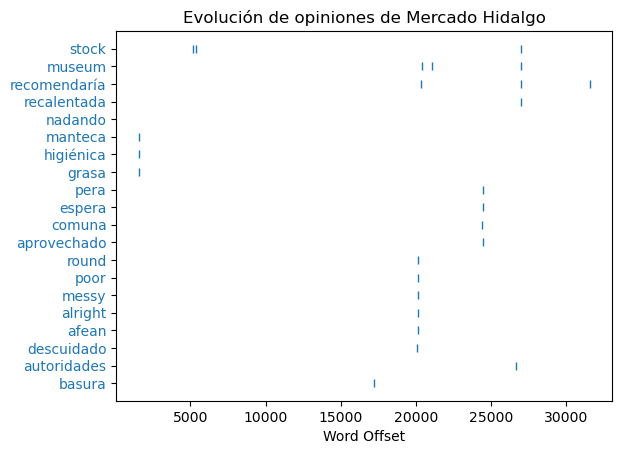

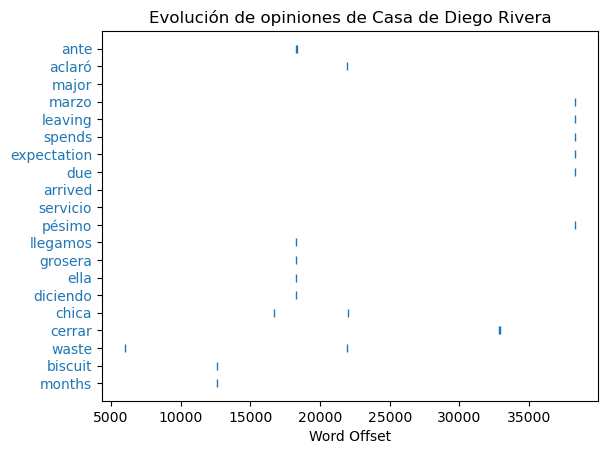

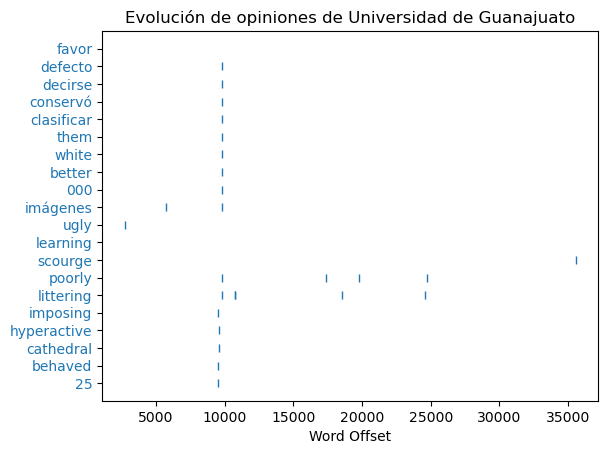

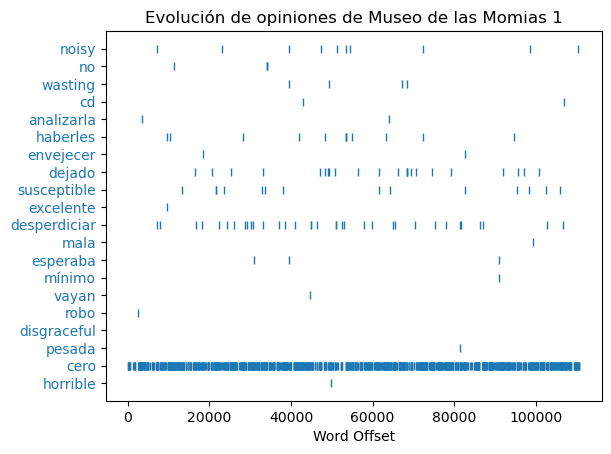

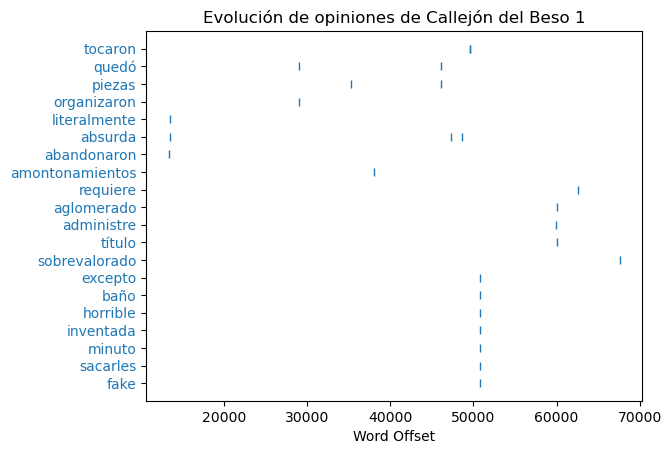

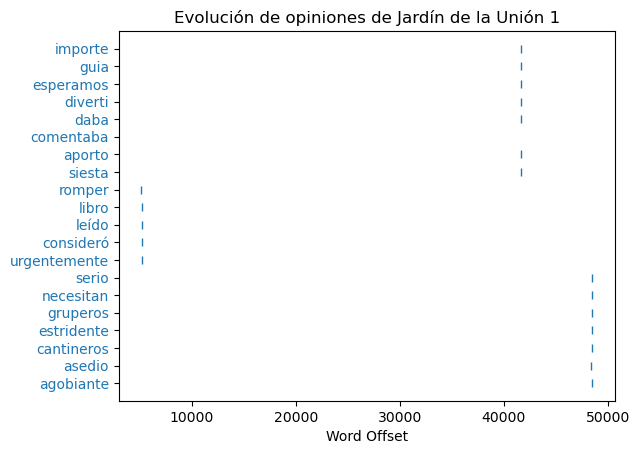

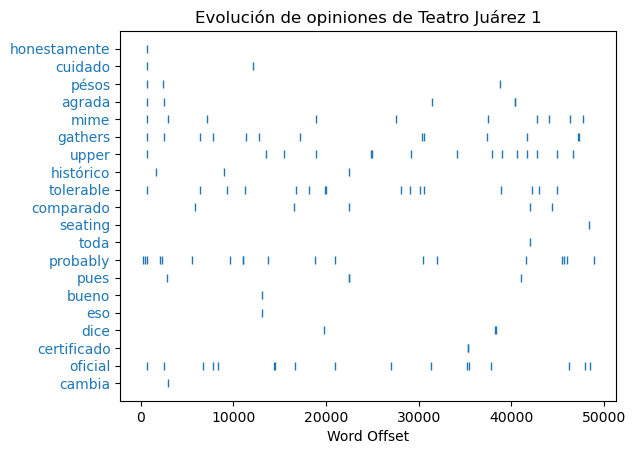

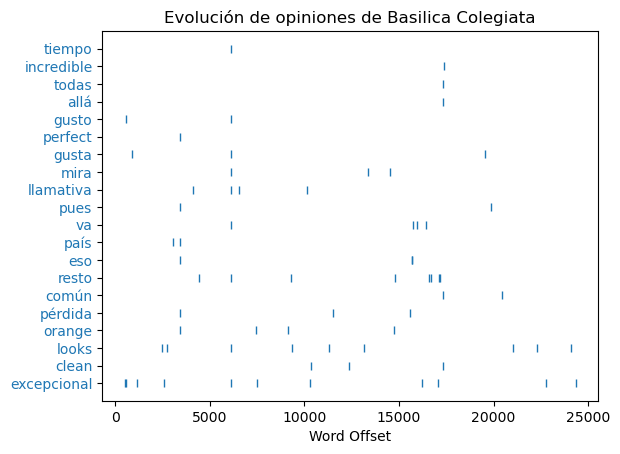

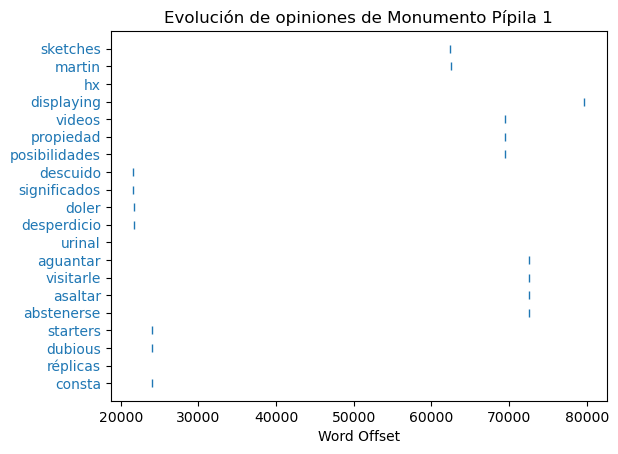

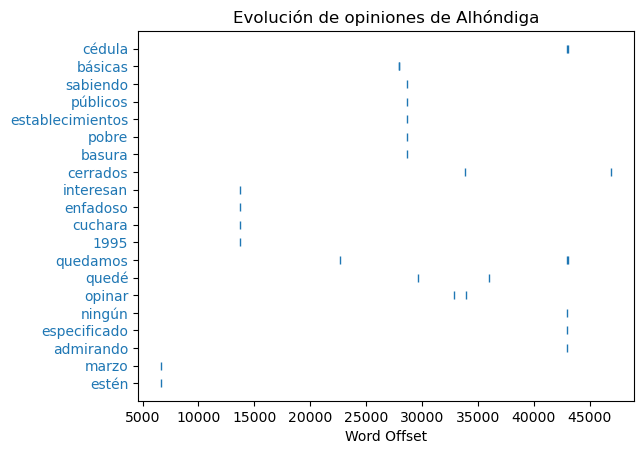

In [309]:
from nltk.draw.dispersion import dispersion_plot
from nltk import TweetTokenizer
tk = TweetTokenizer()

for i in range(10):
    # Sort and tokenized reviews 
    df = df_places_clean[i]
    df = df.sort_values(by='Fecha')
    scores = df['Escala']
    reviews = []
    tokenized_reviews = []
    for review in df['Opinión']:
        tokenized_reviews += tk.tokenize(review)
        reviews.append(review)

    # Extract top words
    vectorizer = TfidfVectorizer()
    bow = vectorizer.fit_transform(reviews)
    kbest = SelectKBest(chi2, k=10)
    bow_selected = kbest.fit_transform(bow, scores)
    top_words = sorted(dict(zip(vectorizer.get_feature_names_out(), kbest.scores_)).items(), key=lambda item: item[1], reverse=True)[:20]
    top_words = [word for word, score in top_words]

    # Dispersion plot
    dispersion_plot(tokenized_reviews, top_words, title=f'Evolución de opiniones de {names_places[i]}')
    plt.show()

1. (10pts) ¿De los sitios turísticos, cual diría usted que es el más polémico y la razón de
ello? 

Considero que el lugar más polémico es el Museo de las Momias, en principio es una de las principales atracciones de la ciudad, pero por un lado tiene el promedio más bajo en opiniones y también la desviación estándar más baja de todos los sitios turísticos, esto último reflejando una gran variedad en cuanto a opiniones positivas y negativas, por otro lado en su respectiva nube de palabras es interesante encontar ejemplos como "respeto", "morbo", "profanación" y "burla", las cuáles hacen alución a la naturaleza del lugar, por otro lado, para la nube de para bigramas se pueden encontrar palabras como "excelente" y "no vayan". Además en el análisis temporal podemos ver que las opiniones han sido muy diversas aunque inclinandose más a opiniones negativas. 

(10pts) En cuanto al sitio más polémico, ¿Como es la diferencia de opinión y temas entre
turistas nacionales e internacionales?

Primeramente de la distribución de tipo de visitantes, podemos ver que no hay diferencia entre el número de turístas nacionales o internacionales, dejando en  evidencia que es una atracción por igual. Por otro lado si nos vamos a la detección automática de tópicos, podemos ver que las opiniones de turístas internacionales hacen alución de manera más contundentes al tema central del lugar que en ese caso son las momias, con palabras como: "boides", "mummified", "dead", "preserved" étc. En contraste con los tópicos asociados a los turístas nacionales, que son más genericos, es interesante ver que un palabra que aparece en topicos de ambas categorias es "interesante", esto contrasta con la nube de palabras que tiene algunos ejemplos como "horrible". 

3. (10pts) ¿Cual diría que es el sitio que le gusta más a las mujeres y por qué? 

Si nos fijamos en la distribución de visitas para hombres y mujeres en la mayoría de los sitios turísticos hay un mayor número de hombres que de mujeres, siendo la excepción "Casa de Diego Rivera" y el "Callejón del Beso", este comportamiento no necesariamente esta correlacionado al interés de hombres o mujeres, para obtener más información vayamos a la detección automática de topicos, en dónde podemos encontrar que lugares como el Teatro Juarez o la Basilica Colegiata tienen tópicos bastante positivos en mujeres, con palabras como "hermoso", "beautiful", "worth", "vale", "pena". Si consideramos la distribución de visitantes de hombres y mujeres para estos últimos dos lugares se puede apreciar que no hay diferencias significativas, partícularmente para el Teatro Juáres, por tanto, considero que el sitio turístico que más agrada a las mujeres es el Teatro Juárez. 

4. (10pts) ¿Cual diría que es el sitio que le gusta más a las personas jóvenes y por qué?

Si revisamos distribución del número de visitas por  edades, se puede apreciar que en general un mayor número de personas jóvenes visitan los lugares turístico, en partícular el Monumento al Pípila tiene un mayor número de visitantes respecto a los demás sitios, para tomar una mejor decisión examinemos los resultados de la detección autómatica de topicos. Para el monumento al Pípila, en el primer tópico podemos encontrar palabras que nos hablan un poco del lugar y de las cosas que lo componen, aquí podemos encontrar: 'vista', 'ciudad', 'guanajuato', 'monumento', 'lugar', 'subir', 'pípila'. De manera más específica en el tercer topico encontramos palabras como: 'panorámica', 'hermosa', 'mejor', 'fotos', 'maravillosa', 'historia'. Lo cuál indica una opinión positiva dentro de la comunidad de gente jóven. Por lo tanto, por la distribución de visitantes y el análisis de detección de tópicos, considero que el lugar que más agrada a personas jóvenes es el monumento al Pípila. 


5. (10pts) ¿Qué otras observaciones valiosas puede obtener de su análisis? (e.g., ¿identificó
de que se queja la gente? ¿qué tipo de cosas le gustó a la gente?, etc.)

Una de las principales quejas de la gente que se puede ver en las nubes de palabras es el mal olor y la basura, por ejemplo en el Mercado Hidalgo se pueden ver claramente, así como en el Monumento al Pípila. En general parece ser que el sitio turístico que más agrada a la gente es el Jardín de la Unión, con un promedio de 4.9/5 y una desviación estándar de 0.61, lo cual muestra que además de tener una calificación promedio muy alta, no hay mucha variación en los scores de los turístas respecto a los demás sitios. Algunos lugares que también parecen agradar a la gente son el Teatro Juárez y la Basílica Colegiata, de estos dos resalta que son lugares bellos/agradables. Por último también se puede ver de las nubes de palabras que los turístas resaltan el hecho de que los sitios suelen estar abarrotados de gente, en partícular el Jardín de la unión o el callejón del beso.